# **Assignment 20.1 - Initial Report on Gold Price & Exploratory Data Analysis**

# **Project Overview**
This repository contains the initial report and exploratory data analysis (EDA) for my capstone project on gold price prediction. Gold prices are considered a safe deposit, which deeply interests me. I wanted to explore a comprehensive dataset on gold prices and use it to build a predictive model that considers economic factors influencing gold prices.

# **Problem Statement:**
 Develop a machine learning model to predict gold prices by analyzing the impact of various economic indicators.
* Data Needed:
* Economic indicators (e.g., inflation rates, interest rates, GDP)
* Historical gold prices
# **Techniques:**
* Multiple Linear Regression
* Random Forest
* Gradient Boosting
* Lasso Regression

# **Source of Data:**
Yahoo Finance, Kitco, Kaggle. I ended up using a dataset from Kaggle as it contains historical gold prices, financial information for some market indices, commodities, economic indicators, and forex rates. This dataset is suitable for my gold price analysis. Source dataset is available Kaggle link [Gold Price Regression](www.kaggle.com/datasets/franciscogcc/financial-data/data).

# **Key Features**
**Market Indices:**

* S&P 500: Includes opening, closing, high, low prices, and volume.
* NASDAQ:Includes opening, closing, high, low prices, and volume.

# **Economic Indicators:**

* Interest Rates (us_rates_%): Reflects the prevailing interest rates.
* Consumer Price Index (CPI): Measures inflation.

#**Forex Rates:**

* USD/CHF: Exchange rate between US Dollar and Swiss Franc.
* EUR/USD: Exchange rate between Euro and US Dollar.

# **Commodities:**

* Silver: Includes opening, closing, high, low prices, and volume.
* Oil: Includes opening, closing, high, low prices, and volume.
* Platinum: Includes opening, closing, high, low prices, and volume.
* Palladium: Includes opening, closing, high, low prices, and volume.

# **Gold Prices:**
* Gold: Includes opening, closing, high, low prices, and volume.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


Read data set

In [31]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Assignment_20.1/financial_regression.csv'

#create Dataframe
data = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Preview Head
data.head()


,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [33]:
# Check data types
print(data.dtypes)

date                   object
sp500 open            float64
sp500 high            float64
sp500 low             float64
sp500 close           float64
sp500 volume          float64
sp500 high-low        float64
nasdaq open           float64
nasdaq high           float64
nasdaq low            float64
nasdaq close          float64
nasdaq volume         float64
nasdaq high-low       float64
us_rates_%            float64
CPI                   float64
usd_chf               float64
eur_usd               float64
GDP                   float64
silver open           float64
silver high           float64
silver low            float64
silver close          float64
silver volume         float64
silver high-low       float64
oil open              float64
oil high              float64
oil low               float64
oil close             float64
oil volume            float64
oil high-low          float64
platinum open         float64
platinum high         float64
platinum low          float64
platinum c

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

# **Data Preparation**
**Handling Missing Values:**
* Dropped rows with missing values to ensure a clean dataset.

**Feature Engineering:**
* Selected relevant financial indicators as features.
Chose the gold closing price as the target variable.

**Data Transformation:**
* Standardized the features using StandardScaler.
* Split the data into training and testing sets.

In [35]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Select features and target variable
features = data_cleaned[['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low',
                         'nasdaq open', 'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
                         'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open', 'silver high', 'silver low',
                         'silver close', 'silver volume', 'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
                         'oil volume', 'oil high-low', 'platinum open', 'platinum high', 'platinum low', 'platinum close',
                         'platinum volume', 'platinum high-low', 'palladium open', 'palladium high', 'palladium low',
                         'palladium close', 'palladium volume']]
target = data_cleaned['gold close']

**Pairplot of Selected Features**
* Pairplot of selected features to visualize the relationships between them and the gold closing price.

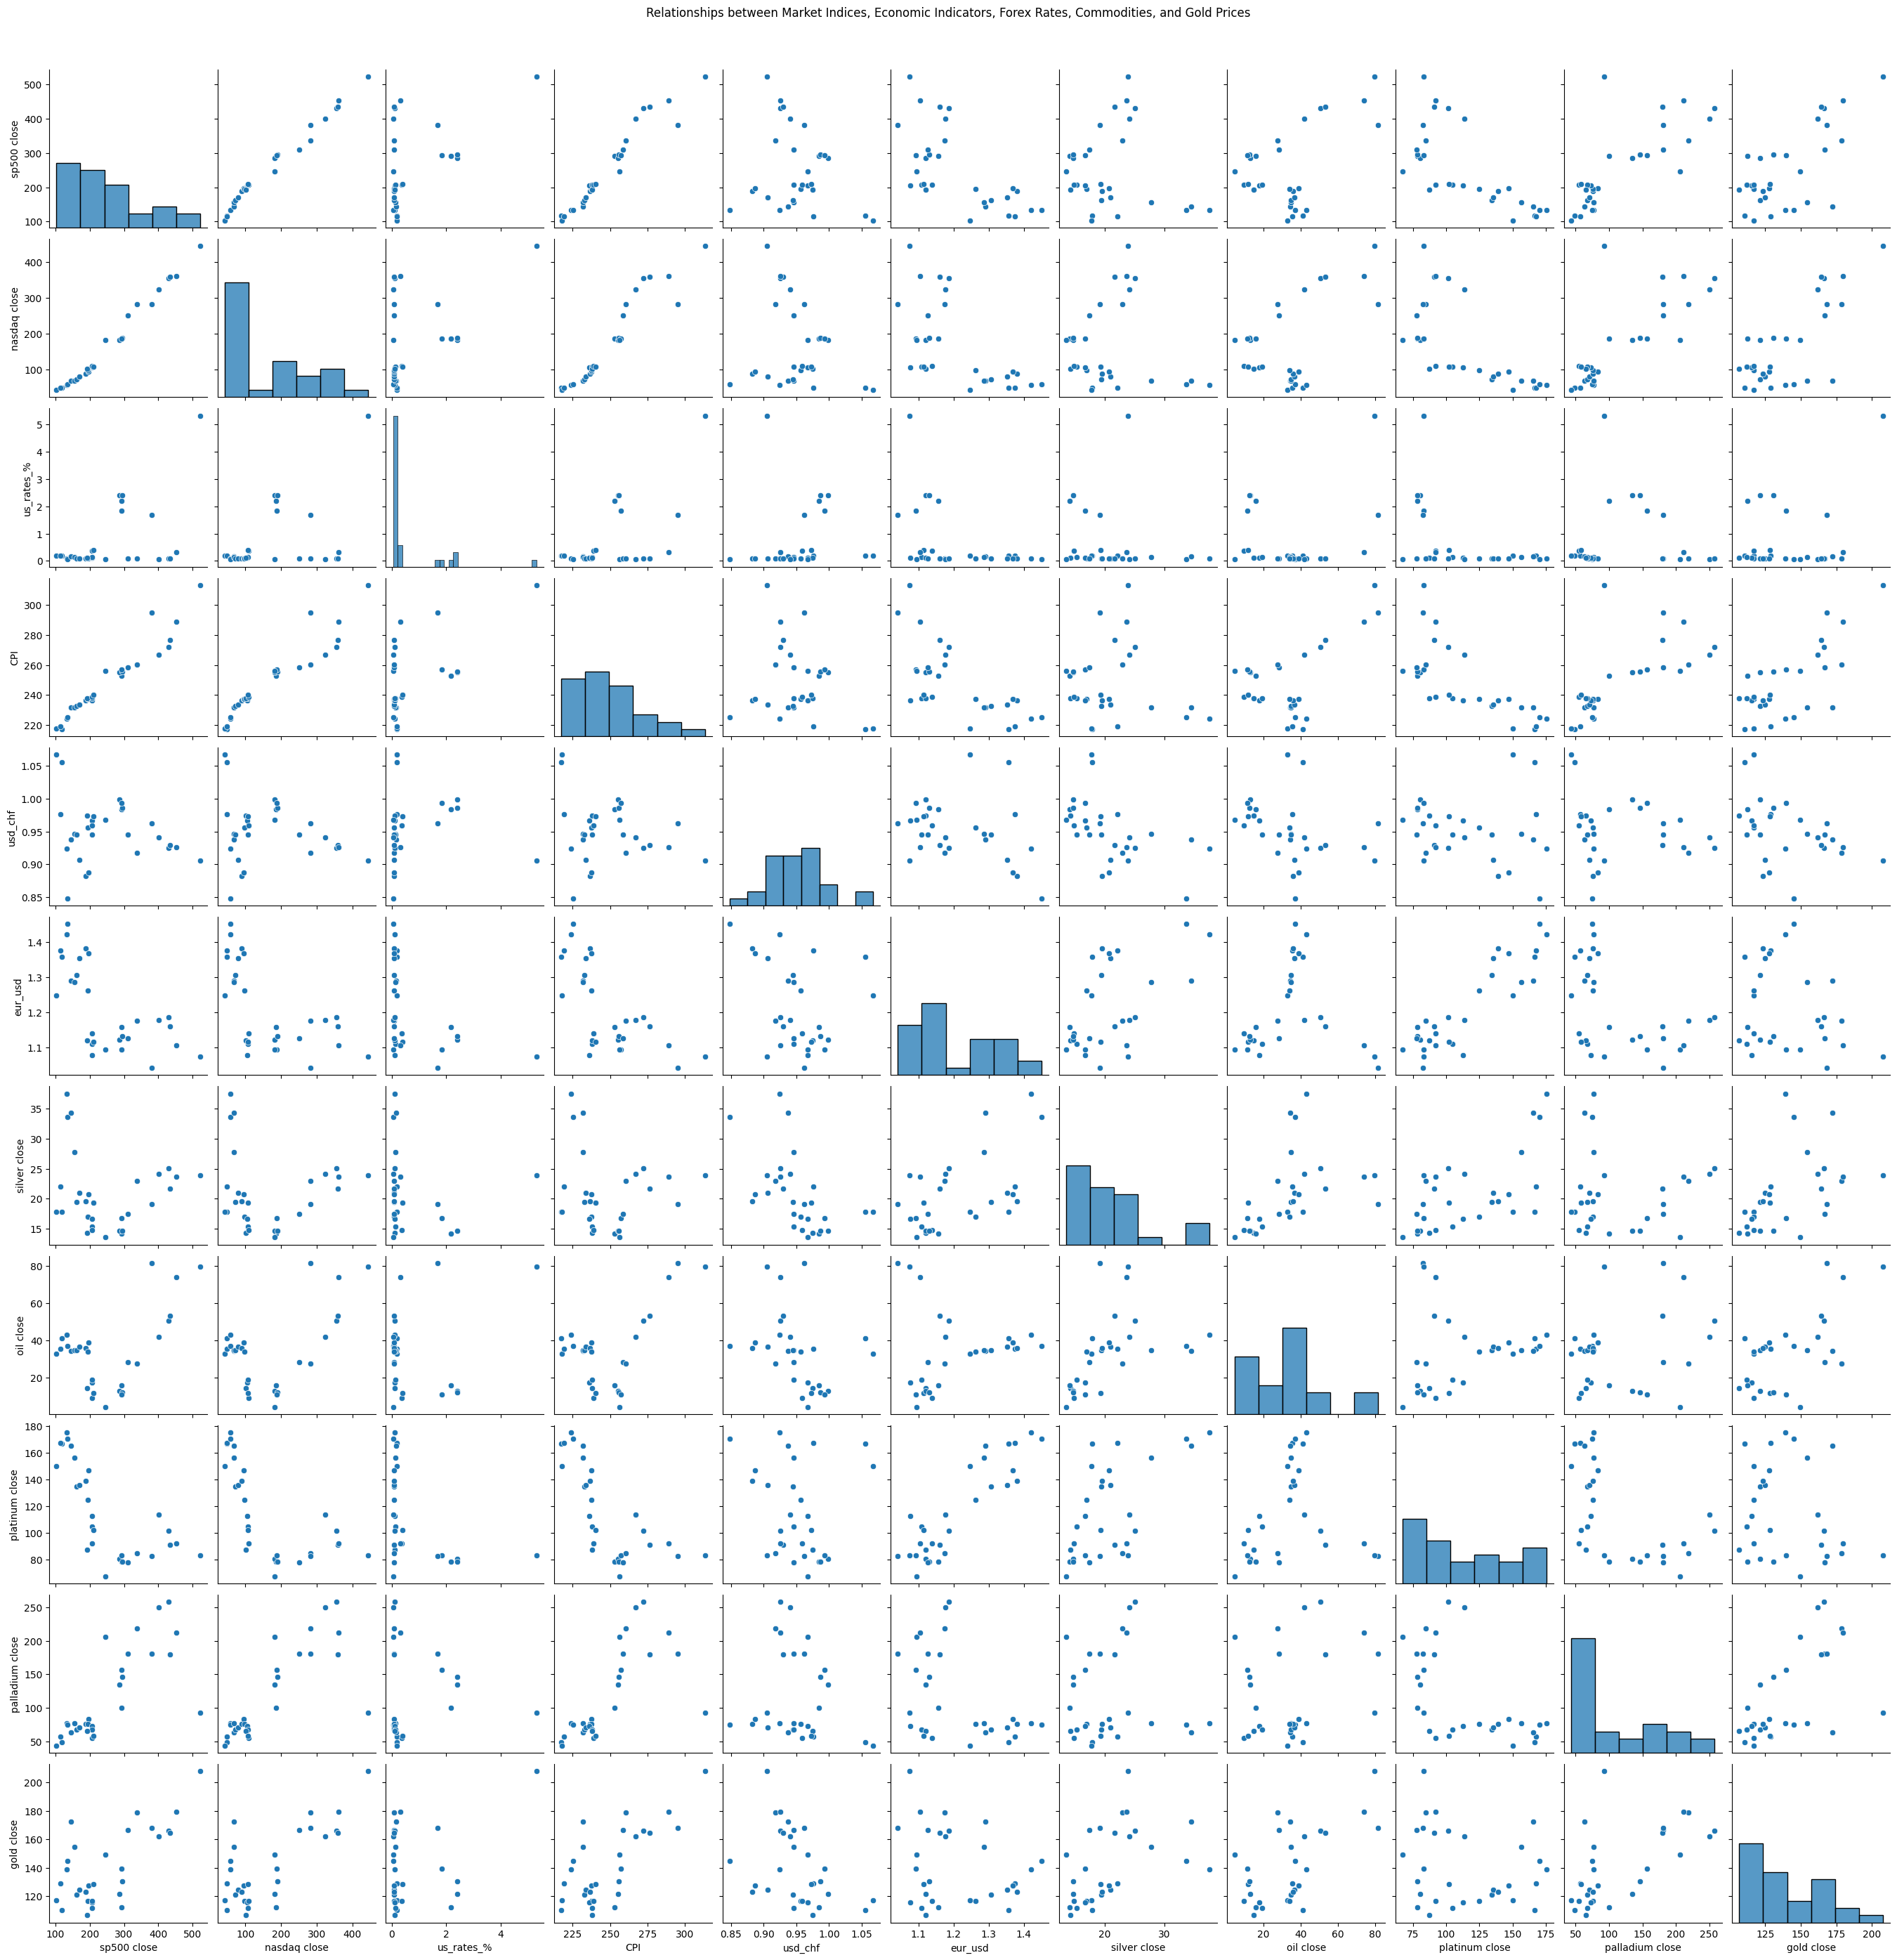

In [50]:

# Select relevant features for the plot
selected_features = ['sp500 close', 'nasdaq close', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd',
                     'silver close', 'oil close', 'platinum close', 'palladium close', 'gold close']

# Create a pairplot to show the relationships between Market Indices, Economic Indicators, Forex Rates, Commodities, and Gold Prices
sns.pairplot(data_cleaned[selected_features])
plt.suptitle('Relationships between Market Indices, Economic Indicators, Forex Rates, Commodities, and Gold Prices', y=1.02)
plt.show()


In [36]:

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


# Initialize models

# Initialize models
models = {
  "Linear Regression": LinearRegression(),
  "Ridge Regression": Ridge(),
  "Lasso Regression": Lasso(max_iter=10000),
  "Random Forest Regression": RandomForestRegressor(),
  "Gradient Boosting Regression": GradientBoostingRegressor()
}


# Define hyperparameters for Grid Search
param_grid = {
   "Ridge Regression": {"alpha": [0.1, 1.0, 10.0]},
   "Lasso Regression": {"alpha": [0.01, 0.1, 1.0]},
   "Random Forest Regression": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
   "Gradient Boosting Regression": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]}
}



In [45]:
# Train and evaluate models

# Perform Grid Search and cross-validation

# Train and evaluate models
results = {}
predictions = {}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  results[name] = {"Mean Squared Error": mse, "R-squared": r2}
  predictions[name] = y_pred



# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {result['Mean Squared Error']}")
    print(f"  R-squared: {result['R-squared']}")



Linear Regression:
  Mean Squared Error: 29.19048919786371
  R-squared: 0.8862496222603973
Ridge Regression:
  Mean Squared Error: 32.1929833969403
  R-squared: 0.8862496222603973
Lasso Regression:
  Mean Squared Error: 58.39627000705779
  R-squared: 0.8862496222603973
Random Forest Regression:
  Mean Squared Error: 175.1257800162508
  R-squared: 0.8862496222603973
Gradient Boosting Regression:
  Mean Squared Error: 89.0388320307855
  R-squared: 0.8862496222603973


In [47]:
# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {result['Mean Squared Error']}")
    print(f"  R-squared: {result['R-squared']}")

Linear Regression:
  Mean Squared Error: 29.19048919786371
  R-squared: 0.8862496222603973
Ridge Regression:
  Mean Squared Error: 32.1929833969403
  R-squared: 0.8862496222603973
Lasso Regression:
  Mean Squared Error: 58.39627000705779
  R-squared: 0.8862496222603973
Random Forest Regression:
  Mean Squared Error: 175.1257800162508
  R-squared: 0.8862496222603973
Gradient Boosting Regression:
  Mean Squared Error: 89.0388320307855
  R-squared: 0.8862496222603973


# **Key Findings**
**Positive Correlation:**
* Silver and platinum prices have strong positive correlations with gold prices.
* Oil prices show moderate positive correlations with gold prices.

**Negative Correlation:**
* Interest rates have a negative correlation with gold prices.

**Stock Market Indicators:**
* Stock market indices show weaker correlations with gold prices.

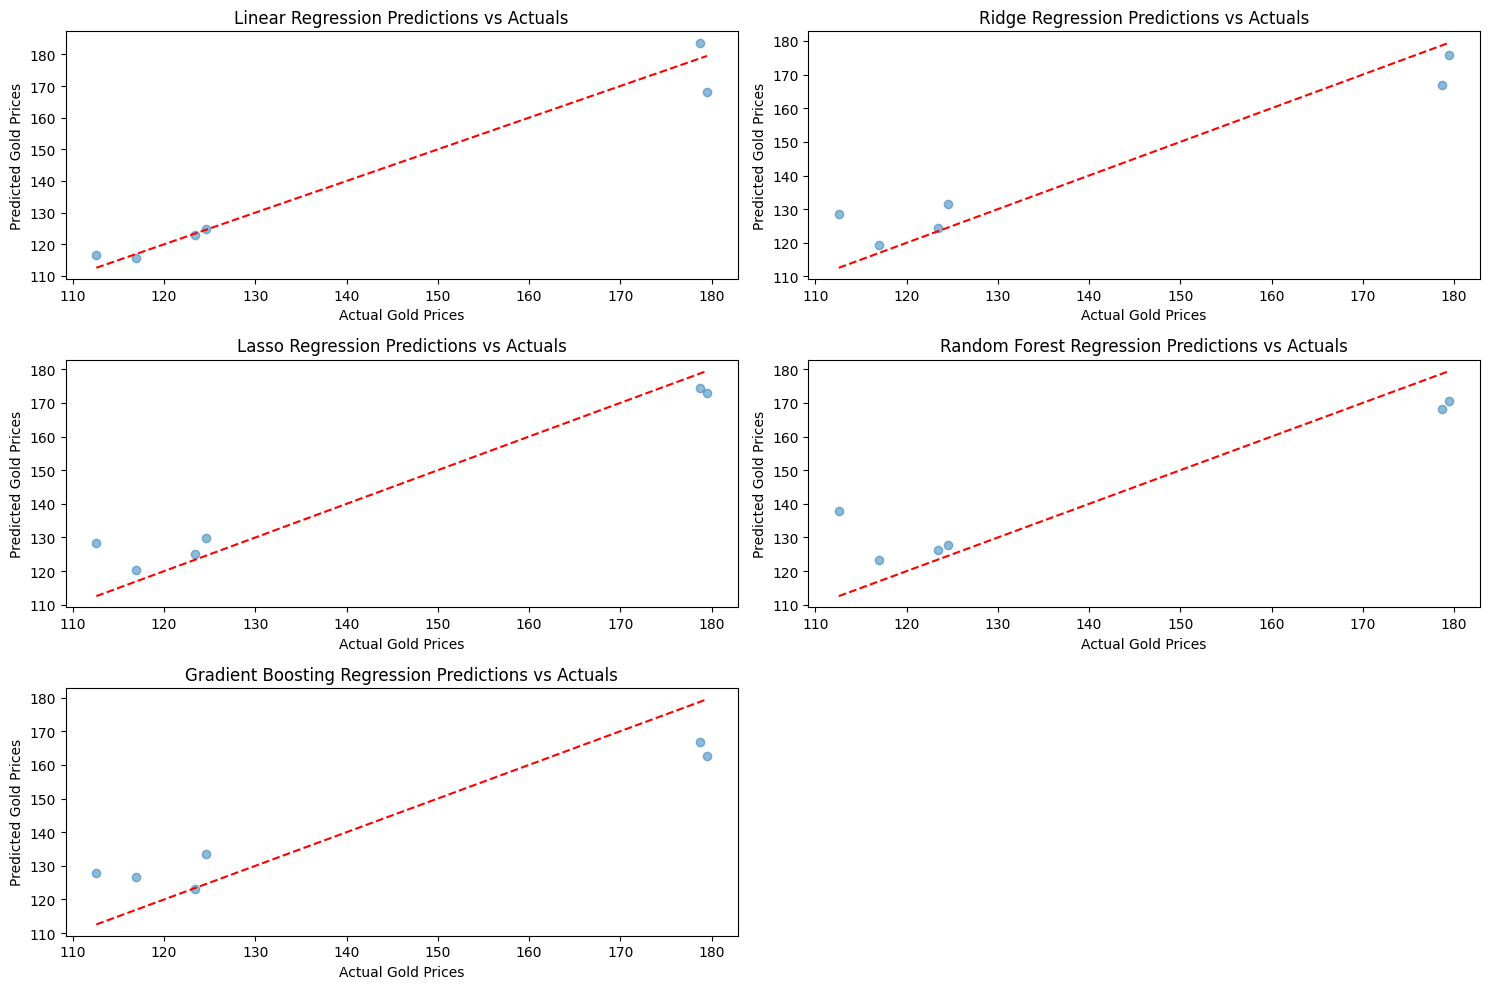

In [41]:

# Plot predictions vs actual values for each model
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
  plt.subplot(3, 2, i)
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
  plt.xlabel('Actual Gold Prices')
  plt.ylabel('Predicted Gold Prices')
  plt.title(f'{name} Predictions vs Actuals')
plt.tight_layout()
plt.show()


**Recommendations**

**Monitor Precious Metal Prices:**

**Silver and Platinum:**
* Since silver and platinum prices have strong positive correlations with gold prices, it is recommended to monitor these precious metals closely. They tend to move in tandem with gold prices.
Keep an Eye on Interest Rates:

**Interest Rates:**
* Higher interest rates may lead to lower gold prices. It is important to keep an eye on interest rate changes as they can significantly impact gold prices.
Consider the Impact of Oil Prices:

**Oil Prices:**
* Oil prices show moderate positive correlations with gold prices. During periods of economic uncertainty, consider the influence of oil prices on gold prices.

**Stock Market Indicators:**
Stock Market: While stock market indicators are important, they may not be the primary drivers of gold prices. Focus more on precious metals and interest rates.